In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install librosa

In [3]:
import librosa


In [4]:
import os
audio_path = '/content/drive/MyDrive/negative'

audio_files = os.listdir(audio_path)

In [5]:
audio_path = '/content/drive/MyDrive/positive'

audio_files = os.listdir(audio_path)

In [6]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import os

def extract_mfcc_features(audio_file, num_mfcc=13, max_length=200):
    y, sr = librosa.load(audio_file, mono=True, duration=5)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)

    if mfccs.shape[1] < max_length:
        pad_width = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]
    return mfccs


positive_directory = '/content/drive/MyDrive/positive'
negative_directory = '/content/drive/MyDrive/negative'


X = []
y = []

for file_name in os.listdir(positive_directory):
    if file_name.endswith('.wav'):
        audio_file_path = os.path.join(positive_directory, file_name)
        mfcc_features = extract_mfcc_features(audio_file_path)
        X.append(mfcc_features)
        y.append(1)  # Label 1 for positive


for file_name in os.listdir(negative_directory):
    if file_name.endswith('.wav'):
        audio_file_path = os.path.join(negative_directory, file_name)
        mfcc_features = extract_mfcc_features(audio_file_path)
        X.append(mfcc_features)
        y.append(0)  # Label 0 for negative

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (114, 13, 200)
y_train shape: (114,)
X_test shape: (29, 13, 200)
y_test shape: (29,)


<ipython-input-7-4795db8d867c>:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


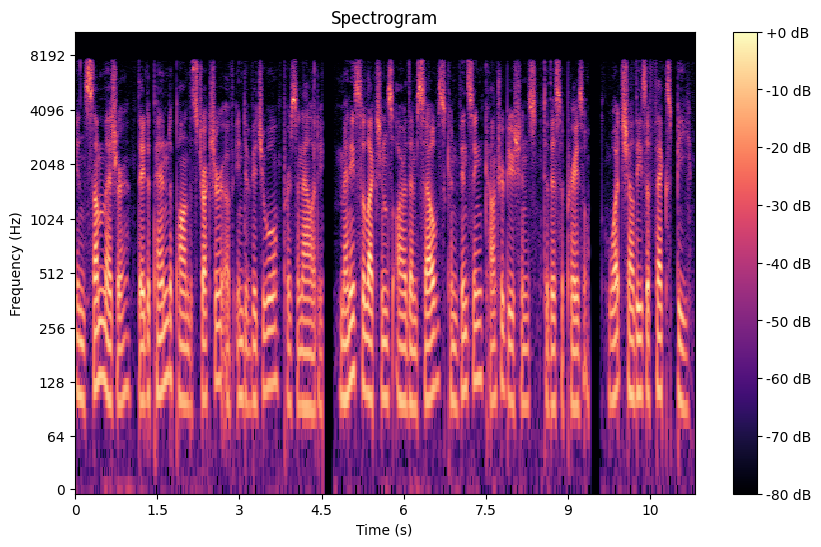

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_file = '/content/drive/MyDrive/negative/clnsp1.wav'
y, sr = librosa.load(audio_file)

# Compute the spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Display the spectrogram on the axis
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

# Add labels and a color bar
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Show the plot
plt.show()

<ipython-input-8-3997a73fb03c>:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


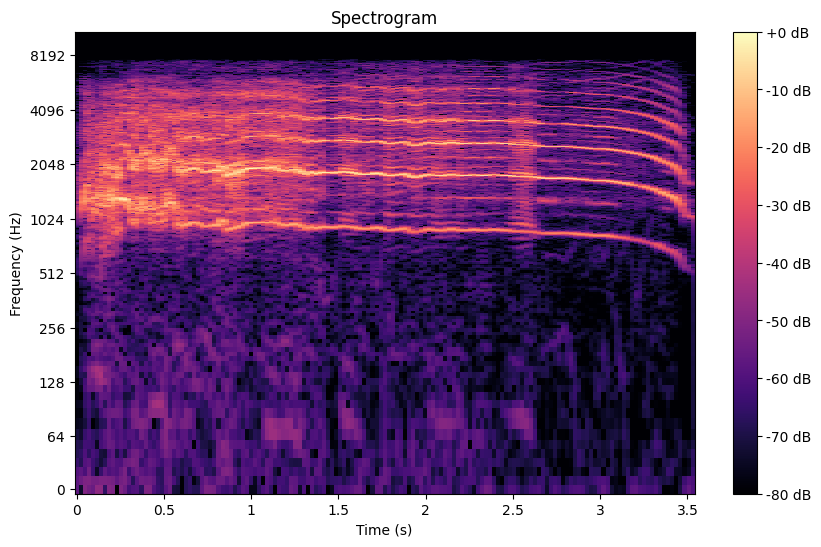

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_file = '/content/drive/MyDrive/positive/femaleScream-002.wav'
y, sr = librosa.load(audio_file)

# Compute the spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Display the spectrogram on the axis
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

# Add labels and a color bar
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Show the plot
plt.show()

In [9]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pickle

# Assuming you already have X_train, y_train, X_test, y_test defined

# Define hyperparameters
input_size = X_train.shape[2]
hidden_size = 128
num_classes = 2
learning_rate = 0.001
num_epochs = 48
batch_size = 32

# Create a Sequential model
model = Sequential()

# Add an RNN layer
model.add(SimpleRNN(hidden_size, return_sequences=True, input_shape=(None, input_size)))
model.add(SimpleRNN(hidden_size, return_sequences=False))  # Output only at the last time step

# Add a fully connected (dense) layer for classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Convert data to NumPy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Train the model
history = model.fit(X_train_np, y_train_np, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test_np, y_test_np))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_np, y_test_np)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")



model.save('rnn_model.h5')

Epoch 1/48
4/4 [==============================] - 6s 399ms/step - loss: 0.7005 - accuracy: 0.6754 - val_loss: 0.7003 - val_accuracy: 0.7586
Epoch 2/48
4/4 [==============================] - 0s 42ms/step - loss: 0.2261 - accuracy: 0.9211 - val_loss: 0.6087 - val_accuracy: 0.7241
Epoch 3/48
4/4 [==============================] - 0s 56ms/step - loss: 0.1172 - accuracy: 0.9912 - val_loss: 0.6090 - val_accuracy: 0.6552
Epoch 4/48
4/4 [==============================] - 0s 50ms/step - loss: 0.0695 - accuracy: 0.9912 - val_loss: 0.6219 - val_accuracy: 0.6897
Epoch 5/48
4/4 [==============================] - 0s 61ms/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 0.6242 - val_accuracy: 0.6897
Epoch 6/48
4/4 [==============================] - 0s 53ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.6317 - val_accuracy: 0.6897
Epoch 7/48
4/4 [==============================] - 0s 41ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.6352 - val_accuracy: 0.7241
Epoch 8/48
4/4 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 603ms/step
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.80      0.75      0.77        16

    accuracy                           0.76        29
   macro avg       0.76      0.76      0.76        29
weighted avg       0.76      0.76      0.76        29



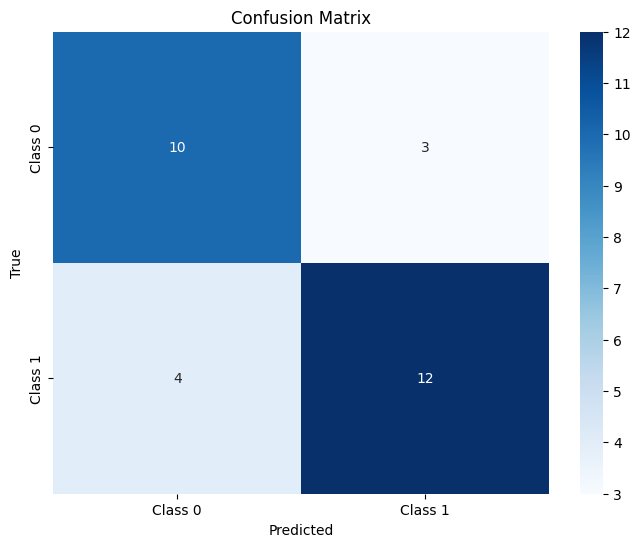

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test_np)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
report = classification_report(y_test_np, y_pred_classes)
print(report)

# Generate a confusion matrix
cm = confusion_matrix(y_test_np, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import sys
print (sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [12]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s et

In [16]:
import gradio as gr
import numpy as np
import tensorflow as tf
import librosa

# Load your trained model
model = tf.keras.models.load_model('rnn_model.h5')

# Define a function to make predictions using your model
def classify_audio(audio):
    # Load and preprocess the input audio
    y, sr = librosa.load(audio, sr=None, mono=True, duration=5)
    mfcc_features = extract_mfcc_features(y, sr)

    # Make a prediction
    prediction = model.predict(np.expand_dims(mfcc_features, axis=0))
    predicted_class = np.argmax(prediction)
    return "Alert: Threat detected!!!" if predicted_class == 1 else "All Clear, No threat Detected!!"

def extract_mfcc_features(audio, sr, num_mfcc=13, max_length=200):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_mfcc)

    if mfccs.shape[1] < max_length:
        pad_width = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]

    return mfccs

# Define the Gradio interface
audio_input = gr.Audio(label="Upload an Audio File")
label = gr.Label()

app = gr.Interface(
    fn=classify_audio,
    inputs=audio_input,
    outputs=label,
    title="Human Scream Detection",
    css="""
    body {
        background-color: #010;
        background-size: cover;
    }
    """
)

# Launch the Gradio interface
app.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f85b082dbb562f306b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
